<a href="https://colab.research.google.com/github/mukhtar-abeer/6220-Project/blob/main/Final_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Environment Setup**

In [ ]:
# Data set was taken from: https://www.kaggle.com/datasets/saumitgp/occupancy-detection-dataset

# Installing necessary libraries

!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s et

In [ ]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Checking the kind of version being used

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**2. Data Initiation and Preparation (Cleaning)**

In [ ]:
# Reading from the file uploaded

df = pd.read_csv('https://raw.githubusercontent.com/mukhtar-abeer/Occupancy2/main/file2.csv')

In [ ]:
# Pulling out the data set for the first 25 rows

df.head(25)

Temperature   Humidity       Light          CO2  HumidityRatio  Occupancy
0     21.760000  31.133333  437.333333  1029.666667       0.005021          1
1     21.790000  31.000000  437.333333  1000.000000       0.005009          1
2     21.767500  31.122500  434.000000  1003.750000       0.005022          1
3     21.767500  31.122500  439.000000  1009.500000       0.005022          1
4     21.790000  31.133333  437.333333  1005.666667       0.005030          1
5     21.760000  31.260000  437.333333  1014.333333       0.005042          1
6     21.790000  31.197500  434.000000  1018.500000       0.005041          1
7     21.790000  31.393333  437.333333  1018.666667       0.005073          1
8     21.790000  31.317500  434.000000  1022.000000       0.005060          1
9     21.790000  31.463333  437.333333  1027.333333       0.005084          1
10    21.790000  31.525000  437.750000  1047.750000       0.005094          1
11    21.790000  31.575000  441.750000  1049.000000       0.005102          1
12    21.790000  31.395000  442.000000  1061.500000       0.005073          1
13    21.790000  31.392500  441.750000  1049.000000       0.005073          1
14    21.790000  31.500000  441.500000  1048.000000       0.005090          1
15    21.815000  31.500000  438.000000  1049.250000       0.005098          1
16    21.815000  31.472500  449.500000  1051.250000       0.005093          1
17    21.890000  31.600000  449.500000  1060.500000       0.005138          1
18    21.790000  31.550000  449.500000  1059.500000       0.005098          1
19    21.823333  31.730000  447.666667  1072.000000       0.005138          1
20    21.865000  31.722500  449.500000  1072.333333       0.005150          1
21    21.890000  31.745000  449.500000  1075.333333       0.005162          1
22    21.890000  31.767500  449.500000  1087.000000       0.005165          1
23    21.890000  31.767500  437.750000  1083.250000       0.005165          1
24    21.890000  31.790000  442.666667  1086.333333       0.005169          1

In [ ]:
# Displaying the number of observations (rows) in the data set

len(df.index)

5142

In [ ]:
# Summarizing the type of data found in the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5142 entries, 0 to 5141
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    5142 non-null   float64
 1   Humidity       5142 non-null   float64
 2   Light          5142 non-null   float64
 3   CO2            5142 non-null   float64
 4   HumidityRatio  5142 non-null   float64
 5   Occupancy      5142 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 241.2 KB


In [ ]:
# Checking to see if any rows are duplicated

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  247


In [ ]:
# Checking to see if any data is found to be not a number

print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**3. Data Analysis**

**3.1 Scatter Plots of Attributes/Features**

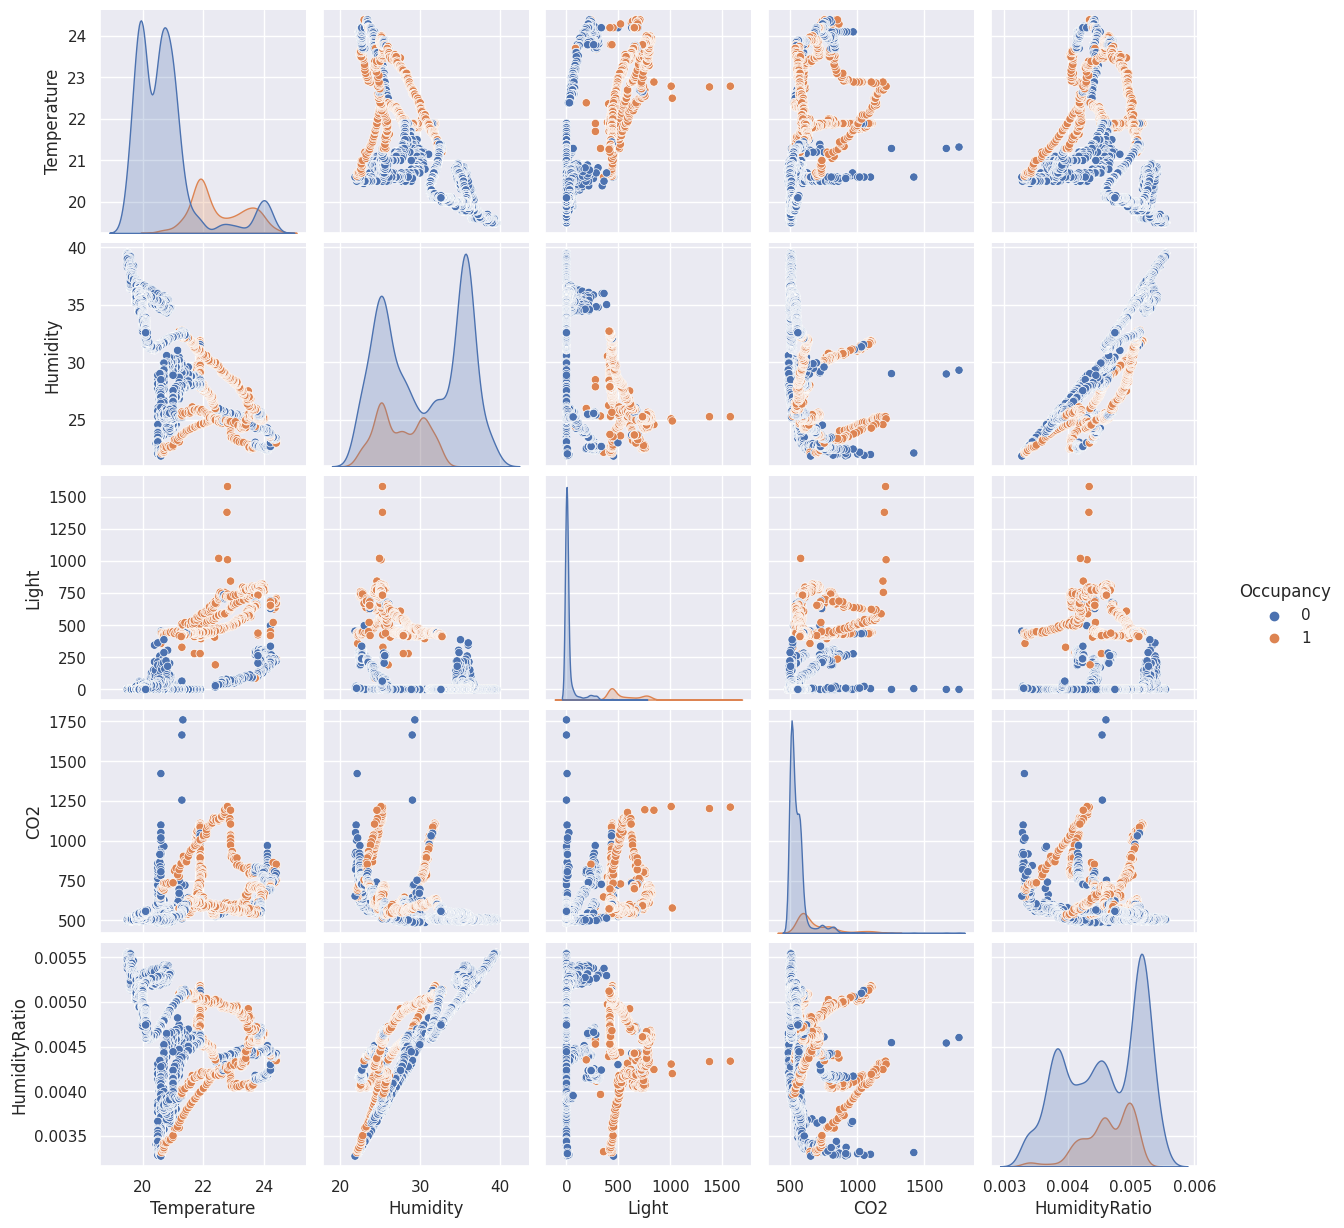

In [ ]:
# Plotting different scatter plots showing the distribution of each variable and their relationship with each other.
sns.pairplot(df, hue='Occupancy')
plt.show()


**3.2 Pie Chart for Classification**

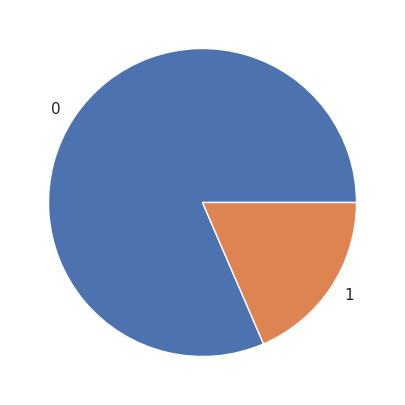

In [ ]:
# Plotting a pie chart showing the proportion for the classiciation: A person present (1) or absent (1) from a room

y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
# Dropping the Occupany column to prepare the data set for further machine learning commands


X = df.drop(columns=['Occupancy'])




# Displaying only the first 10 rows to give an insight on how the new data set looks like

X.head(10)

Temperature   Humidity       Light          CO2  HumidityRatio
0      21.7600  31.133333  437.333333  1029.666667       0.005021
1      21.7900  31.000000  437.333333  1000.000000       0.005009
2      21.7675  31.122500  434.000000  1003.750000       0.005022
3      21.7675  31.122500  439.000000  1009.500000       0.005022
4      21.7900  31.133333  437.333333  1005.666667       0.005030
5      21.7600  31.260000  437.333333  1014.333333       0.005042
6      21.7900  31.197500  434.000000  1018.500000       0.005041
7      21.7900  31.393333  437.333333  1018.666667       0.005073
8      21.7900  31.317500  434.000000  1022.000000       0.005060
9      21.7900  31.463333  437.333333  1027.333333       0.005084

In [ ]:
# Preparing the data set (X) to compute statistical data and display the result as a transport of (X)

X.describe().transpose()

count        mean         std         min         25%  \
Temperature    5142.0   21.051210    1.234281   19.500000   20.000000   
Humidity       5142.0   29.848568    4.888383   21.865000   25.315000   
Light          5142.0  121.883777  223.246675    0.000000    0.000000   
CO2            5142.0  578.515662  109.783497  484.666667  511.000000   
HumidityRatio  5142.0    0.004580    0.000573    0.003275    0.004134   

                      50%         75%          max  
Temperature     20.700000   21.600000    24.390000  
Humidity        29.290000   35.228125    39.500000  
Light            0.000000  103.458333  1581.000000  
CO2            547.000000  585.000000  1760.000000  
HumidityRatio    0.004623    0.005092     0.005547

In [ ]:
# Standardizing the data, leading to the mean = 0, and standard deviation 1 , creating a new data set ((X) and displaying the first 10 rows to have a look at it

Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Humidity     Light       CO2  HumidityRatio
0     0.574309  0.262846  1.413146  4.109861       0.768656
1     0.598617  0.235567  1.413146  3.839606       0.746978
2     0.580386  0.260629  1.398214  3.873767       0.769630
3     0.580386  0.260629  1.420613  3.926148       0.769630
4     0.598617  0.262846  1.413146  3.891227       0.784854
5     0.574309  0.288760  1.413146  3.970178       0.804574
6     0.598617  0.275973  1.398214  4.008135       0.803081
7     0.598617  0.316038  1.413146  4.009654       0.858717
8     0.598617  0.300524  1.398214  4.040019       0.837173
9     0.598617  0.330359  1.413146  4.088605       0.878607

In [ ]:
# Displaying the statistical data for the new data set (X) and display the dataset as a transpose of (X)

X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature    5142.0  4.554549e-15  1.000097 -1.256895 -0.851761 -0.284574   
Humidity       5142.0  7.517216e-16  1.000097 -1.633331 -0.927507 -0.114276   
Light          5142.0 -6.632838e-17  1.000097 -0.546013 -0.546013 -0.546013   
CO2            5142.0 -3.979703e-16  1.000097 -0.854938 -0.615049 -0.287099   
HumidityRatio  5142.0 -2.210946e-16  1.000097 -2.276942 -0.778529  0.073908   

                    75%        max  
Temperature    0.444666   2.705312  
Humidity       1.100585   1.974553  
Light         -0.082542   6.536528  
CO2            0.059071  10.762995  
HumidityRatio  0.892822   1.685214

In [ ]:
# Preparing list of observations and variables

observations = list(df.index)
variables = list(df.columns)

**3.3 Box and Whisker Plots**

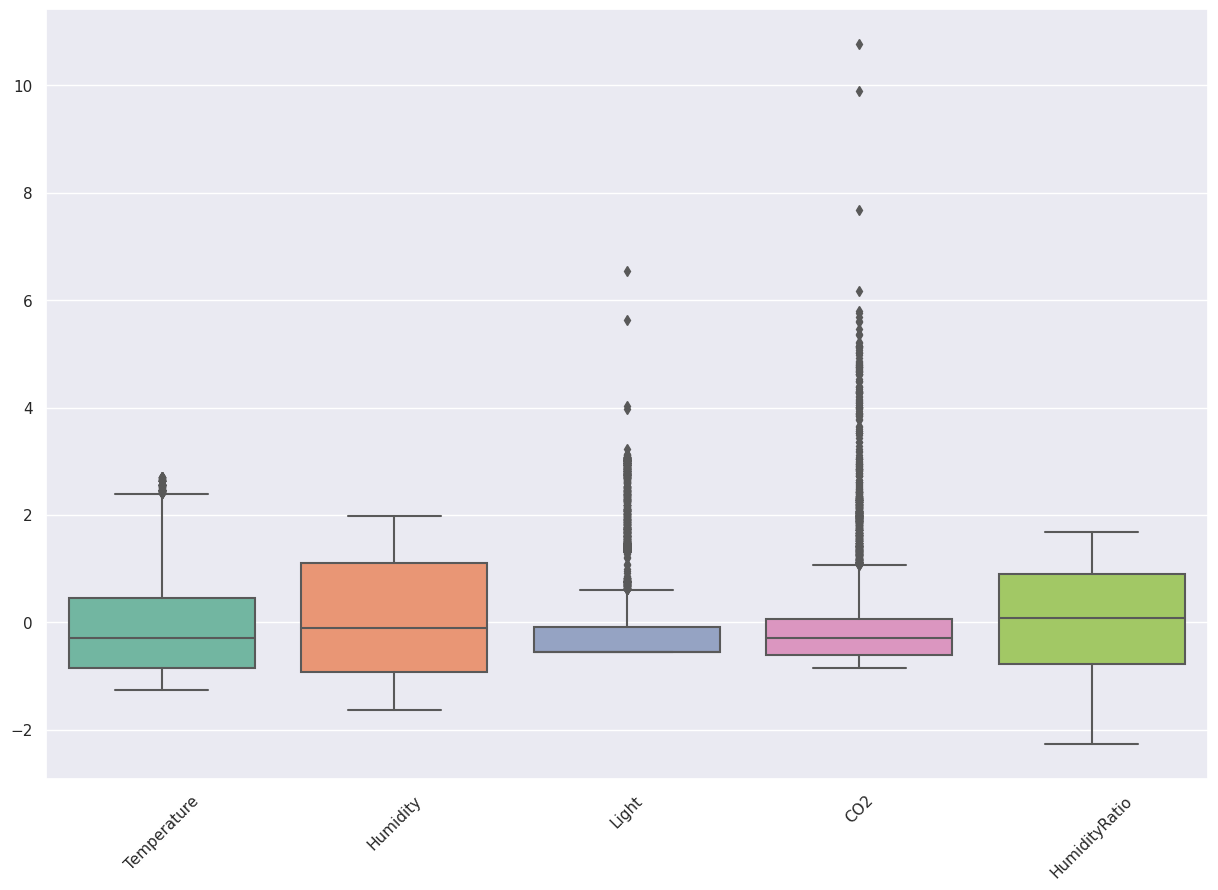

In [ ]:
# Plotting a vertical box plot to help visualize the distribution of the data set for each attribute:

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**3.4 Swarm Plot**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


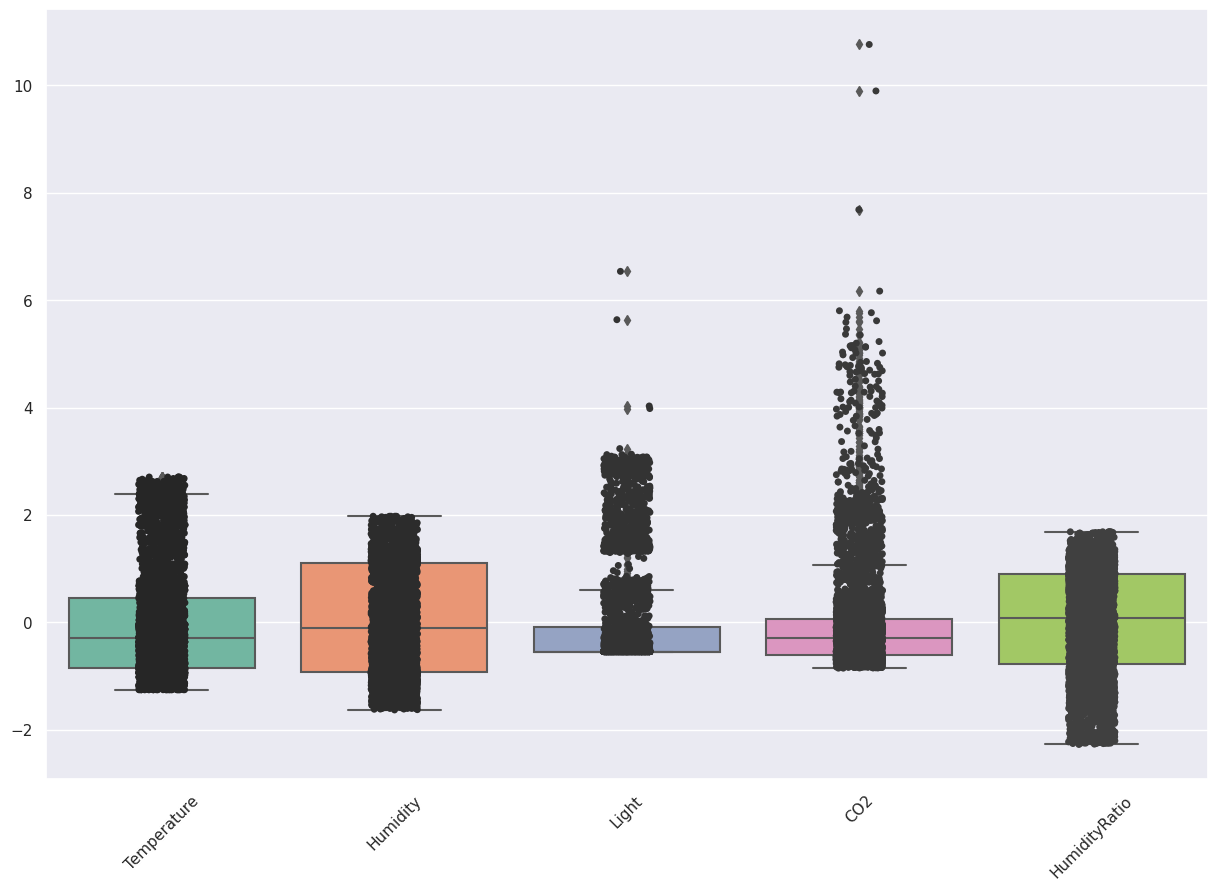

In [ ]:
# Plotting a combined representation of a stripplot and a boxplot to be able to see the spread, central tendancies and potential outliers:

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**3.5 Correlation Matrix**

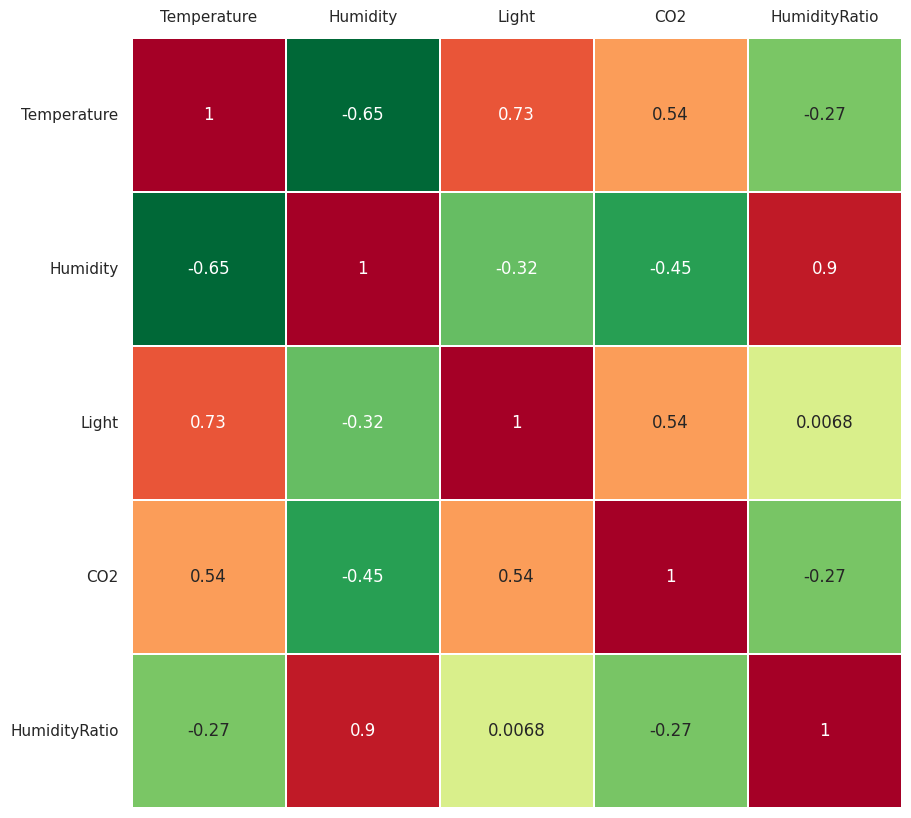

In [ ]:
# Creating a heat map, which shows how the attributes/features are correlated with each other:

fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);


**4. Principal Component Analysis**

**4.1 Scatter Plot of Z1 and Z1**

Number of Absent instances: 4190
Number of Present instances: 952


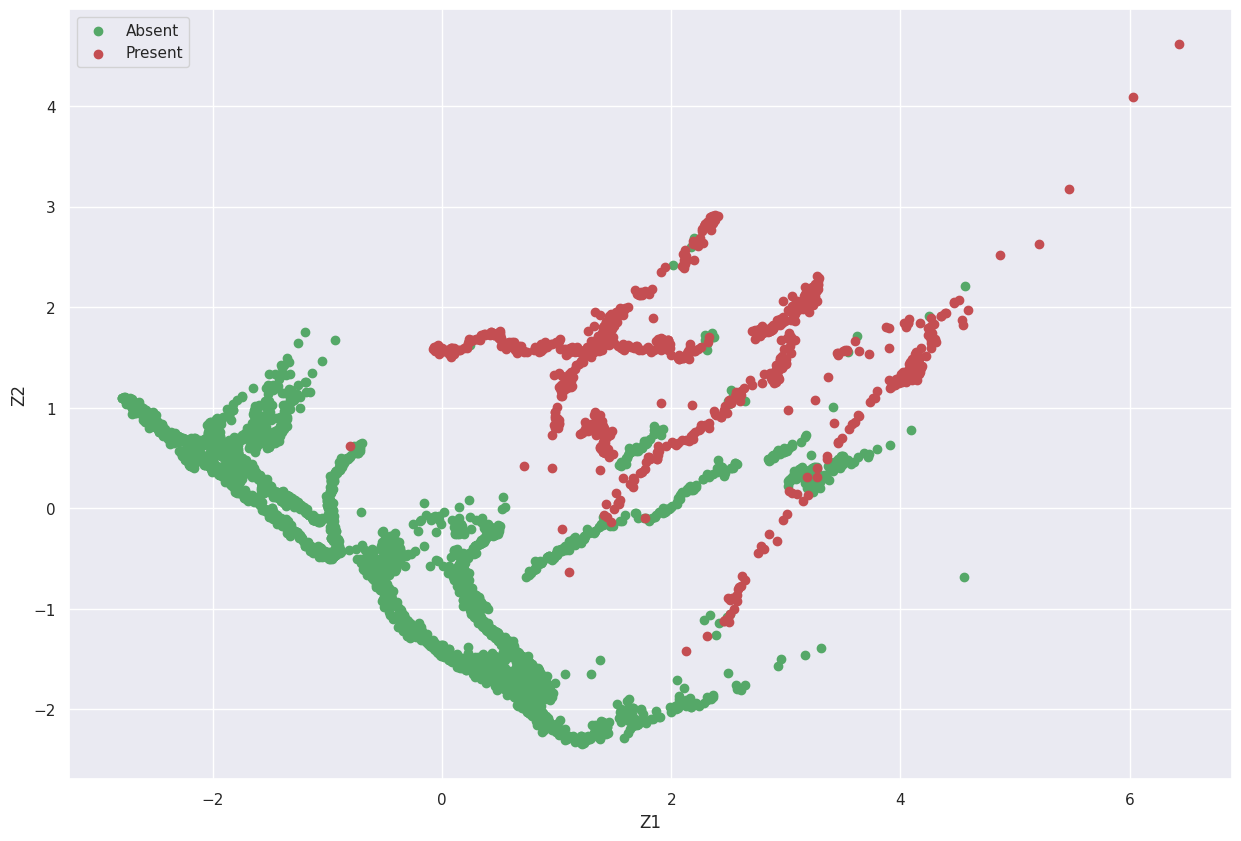

In [ ]:
# Performing PCA and plotting the graph of the first two principal components with green points representing the variable Absent, and red points representing the variable Present:


pca = PCA()
Z = pca.fit_transform(X)

idx_Absent = np.where(y == 0)
idx_Present = np.where(y == 1)

print("Number of Absent instances:", len(idx_Absent[0]))
print("Number of Present instances:", len(idx_Present[0]))

plt.figure(figsize=(15, 10))
plt.scatter(Z[idx_Absent, 0], Z[idx_Absent, 1], c='g', label='Absent')
plt.scatter(Z[idx_Present, 0], Z[idx_Present, 1], c='r', label='Present')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

plt.show()

**4.2 Eigen Vectors**

array([[ 0.50193561,  0.26050975, -0.40824532, -0.6402695 ,  0.32184785],
       [-0.51501715,  0.39628362,  0.15791889,  0.03022736,  0.74287587],
       [ 0.39857919,  0.54601165, -0.24465512,  0.69503424,  0.00878512],
       [ 0.42988652,  0.22955144,  0.86457564, -0.12248369, -0.00322936],
       [-0.3730284 ,  0.65136117, -0.03240725, -0.30177213, -0.58690868]])

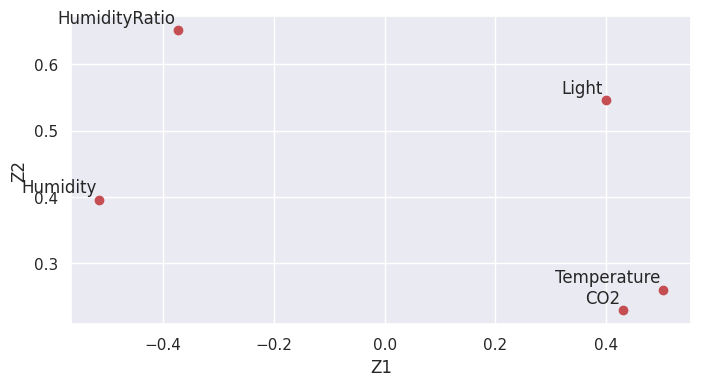

In [ ]:
# Plotting how each variable is contributing to Principal Component 1 and 2:

A = pca.components_.T
plt.figure(figsize=(8, 4))

plt.scatter(A[:, 0], A[:, 1], c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')

for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


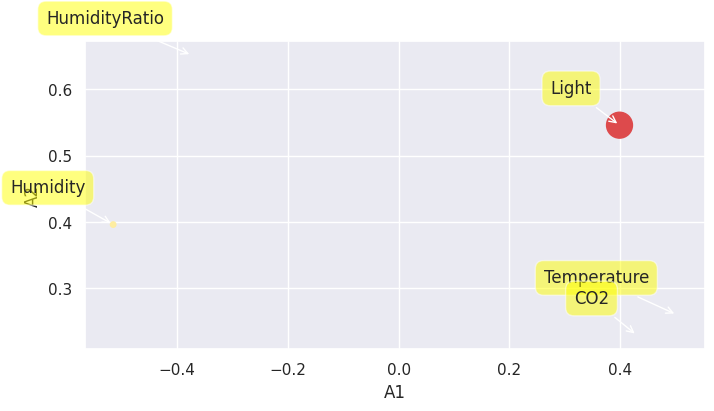

In [ ]:
# Plotting a richer scatter plot which displays the connections between variables and the principal components in a reduced-dimensional space:

plt.figure(figsize=(8, 4))
plt.scatter(A[:, 0], A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')

for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

**4.3 Eigen Values and Scree Plot**

array([2.91847043e+00, 1.35263565e+00, 5.16929204e-01, 2.11872142e-01,
       1.06515449e-03])

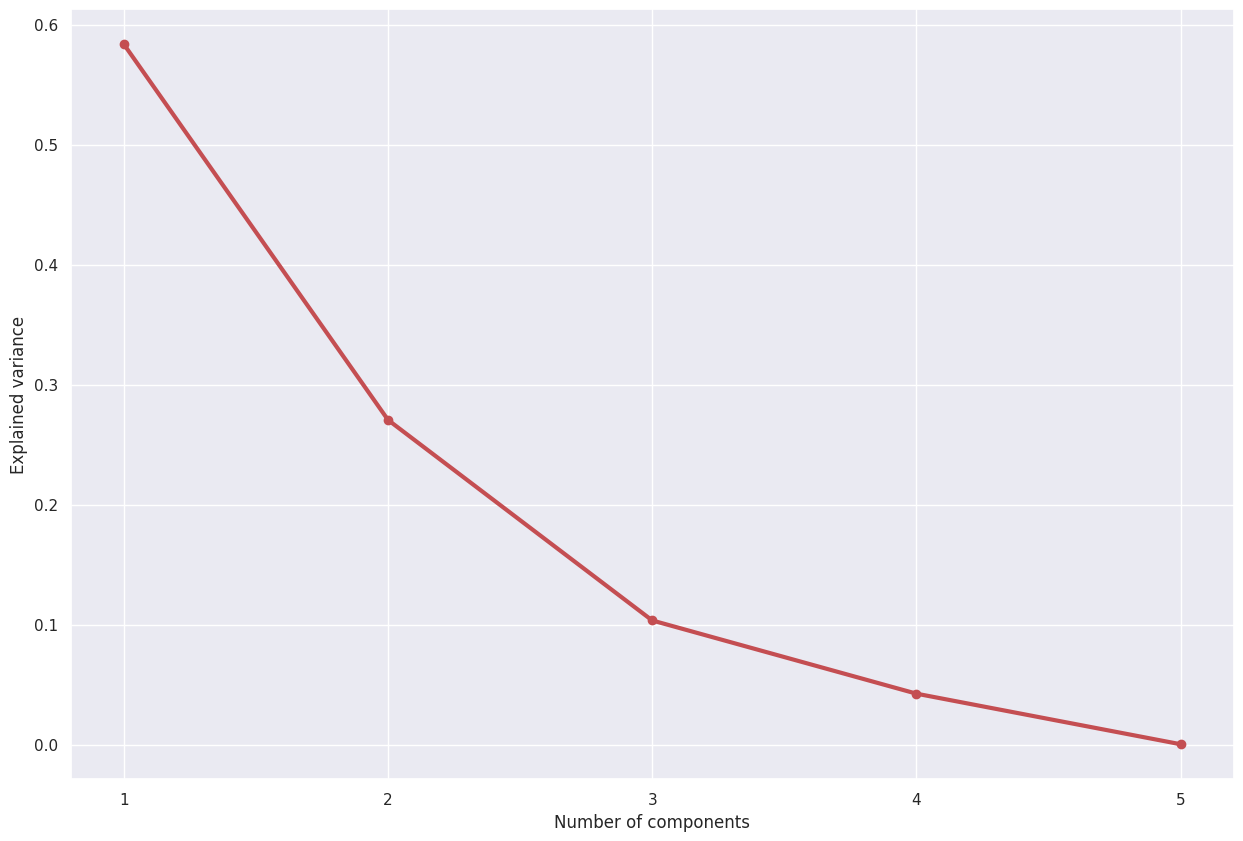

In [ ]:
# Generation of Eigen Values:
Lambda = pca.explained_variance_

# Generating a Scree plot also known as the elbow curve:
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**4.4 Explained Variance with Pareto Chart**

Text(0, 0.5, 'Cumulative explained variance')

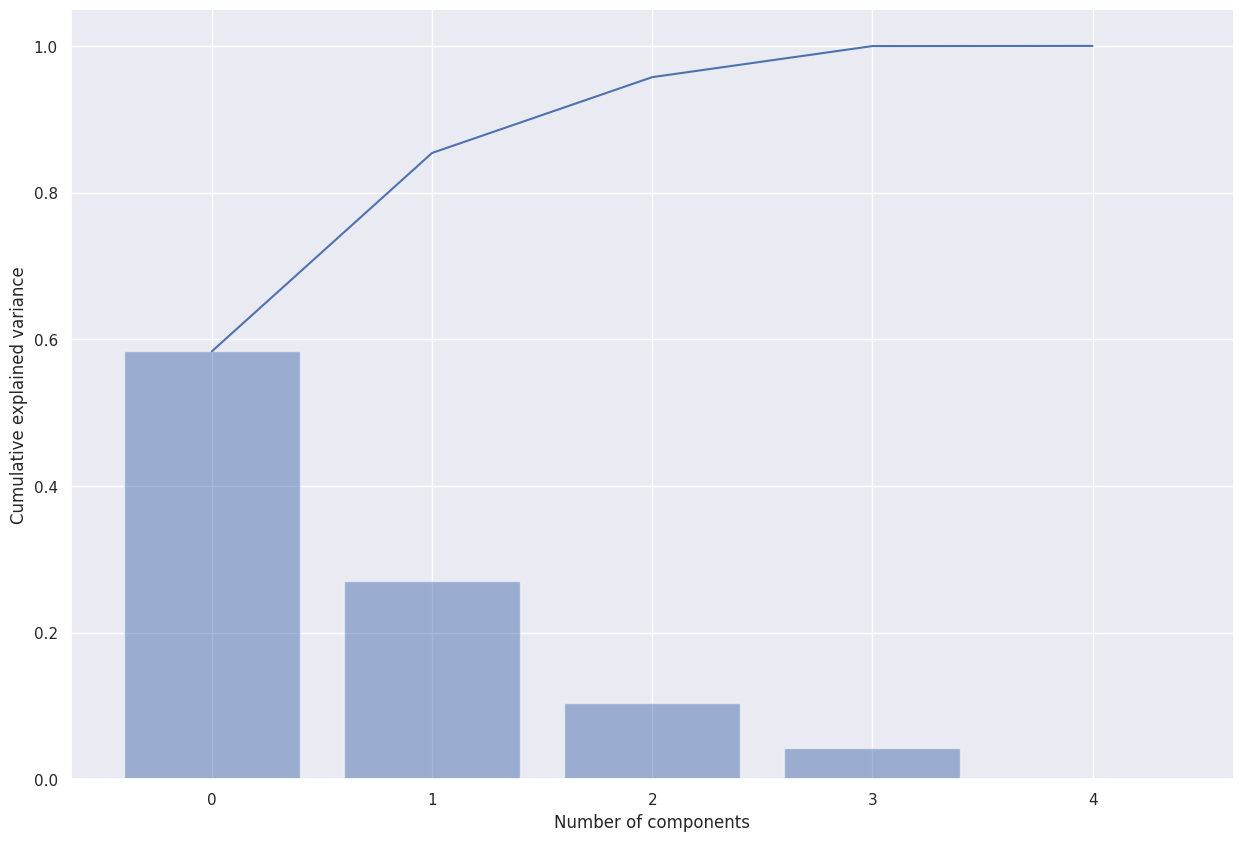

In [ ]:
# Generation of the Pareto Chart

ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**4.5 Installation of PCA Libraries **

In [ ]:
# Installing the PCA package to be able to perform further commands

!pip install pca


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Performing PCA and keeping all the Principal Components:

from pca import pca

model = pca()

out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**4.6 Final Principal Components displaying 99% of variance**

In [ ]:
# Displaying all the Principal Components:

out['PC']

PC1       PC2       PC3
0     2.196190  2.469466  2.989691
1     2.114348  2.388831  2.742506
2     2.092573  2.408456  2.786361
3     2.124019  2.432710  2.826168
4     2.108361  2.436162  2.790218
...        ...       ...       ...
5137 -1.074138 -0.130753  0.377798
5138 -1.068264 -0.127617  0.389612
5139 -1.045818 -0.093960  0.395864
5140 -1.066156 -0.137138  0.381016
5141 -1.085886 -0.137027  0.354170

[5142 rows x 3 columns]

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.97%] of the variance'}, xlabel='PC1 (58.3% expl.var)', ylabel='PC2 (27.0% expl.var)'>)

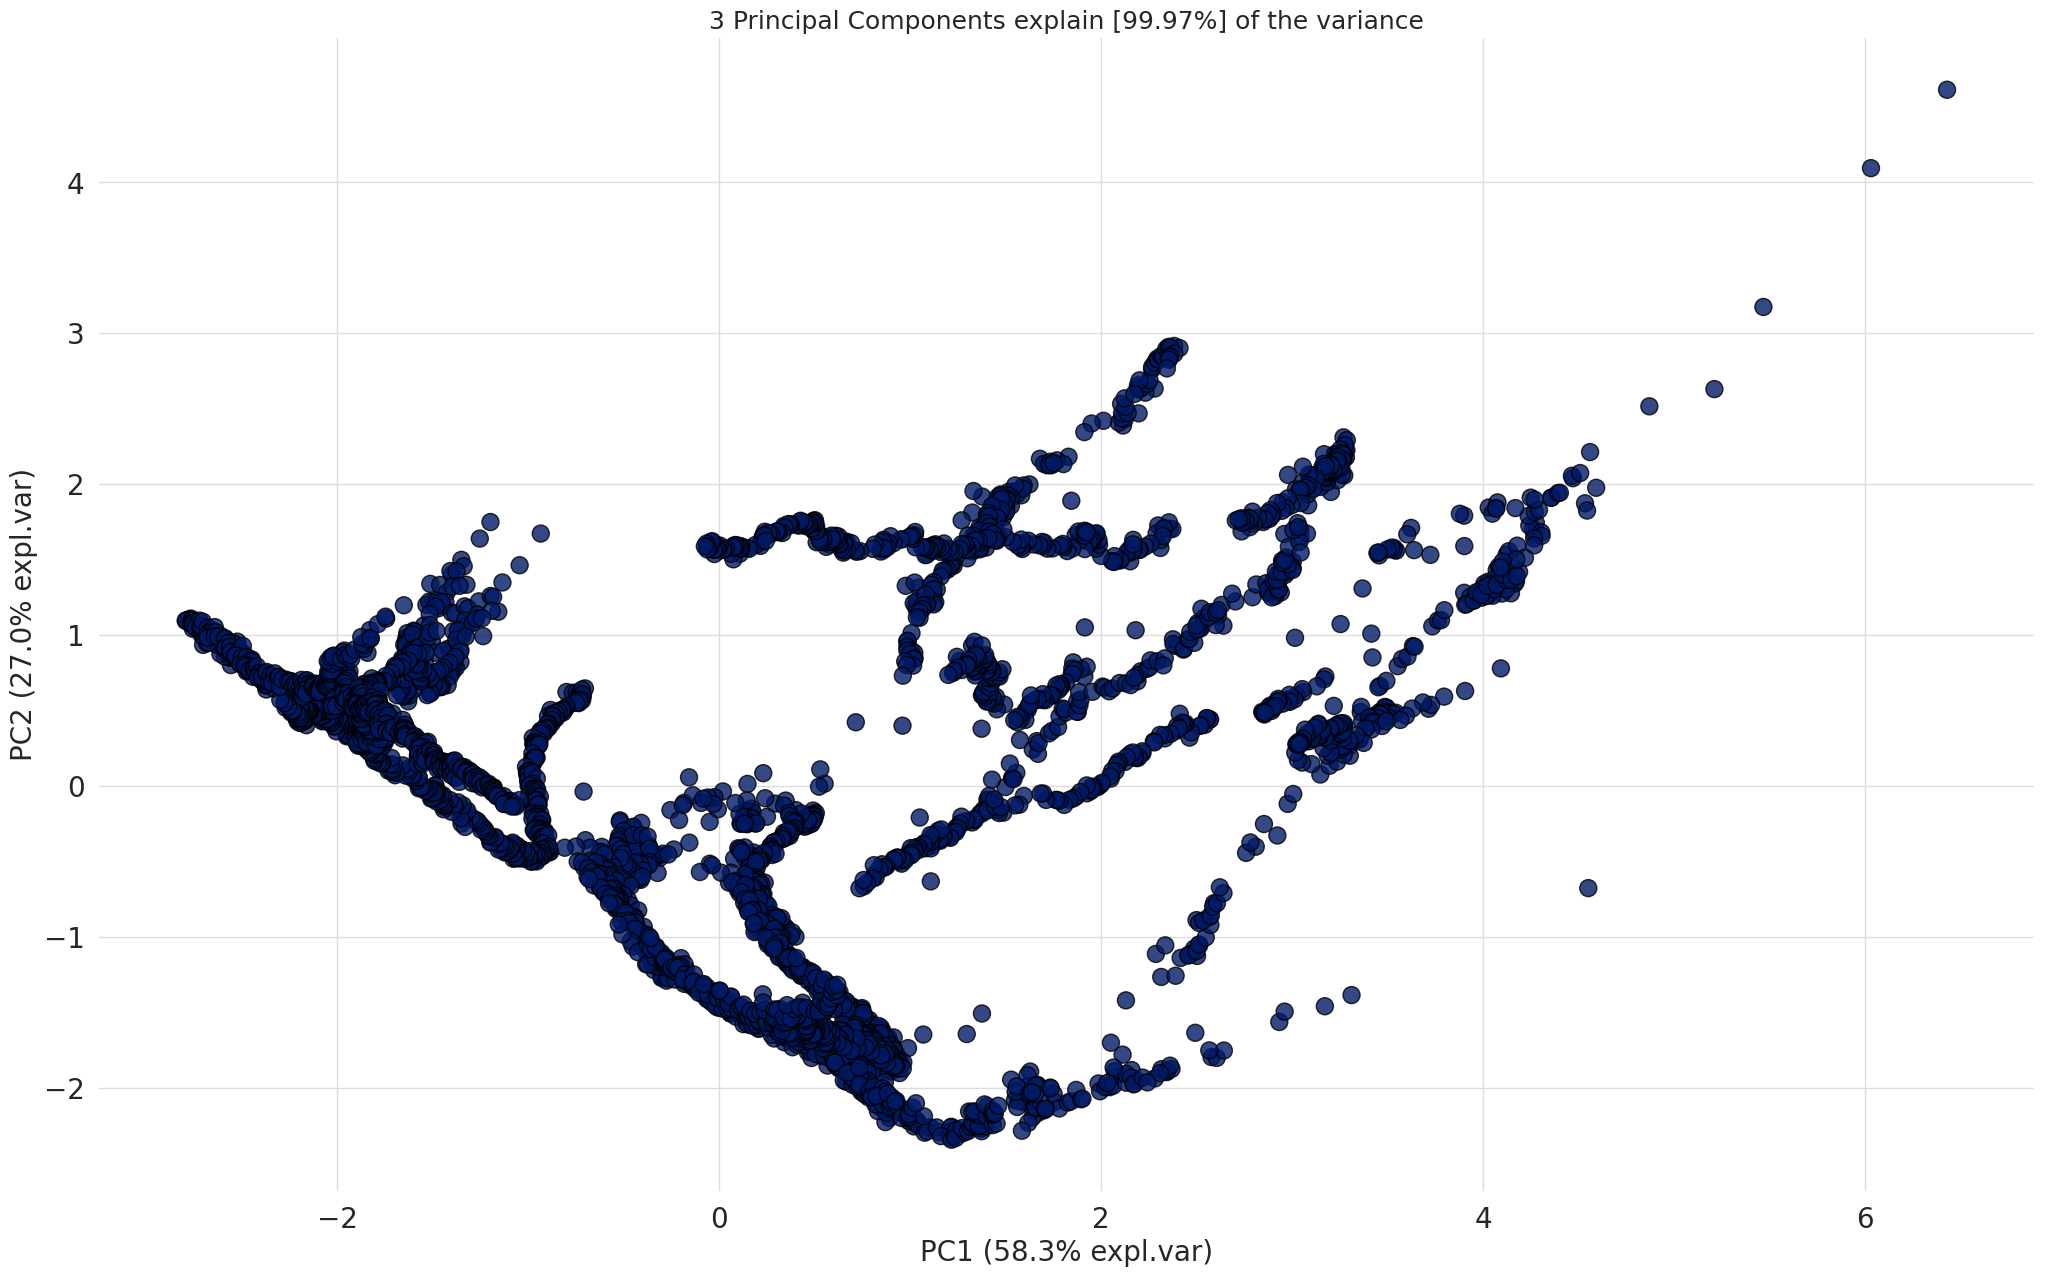

In [ ]:
# Plotting a scatter plot of PC1 and PC2

model.scatter(label=True, legend=False)

**4.7 Principal Components and the Features**

In [ ]:
A = out['loadings'].T
A


PC1       PC2       PC3
Temperature    0.501936  0.260510 -0.408245
Humidity      -0.515017  0.396284  0.157919
Light          0.398579  0.546012 -0.244655
CO2            0.429887  0.229551  0.864576
HumidityRatio -0.373028  0.651361 -0.032407

**4.8 Extra Graphical Representation of Charts for Report**

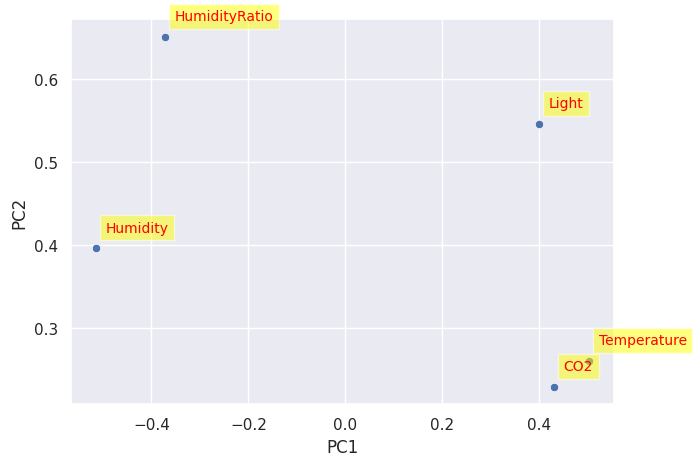

In [ ]:
# Generating a scattor plot of PC1 and PC2, showing how each attribute is distributed:

sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(A.shape[0]):
    plt.text(x=A.PC1[i]+0.02, y=A.PC2[i]+0.02, s=variables[i],
             fontdict=dict(color='red', size=10),
             bbox=dict(facecolor='yellow', alpha=0.5))

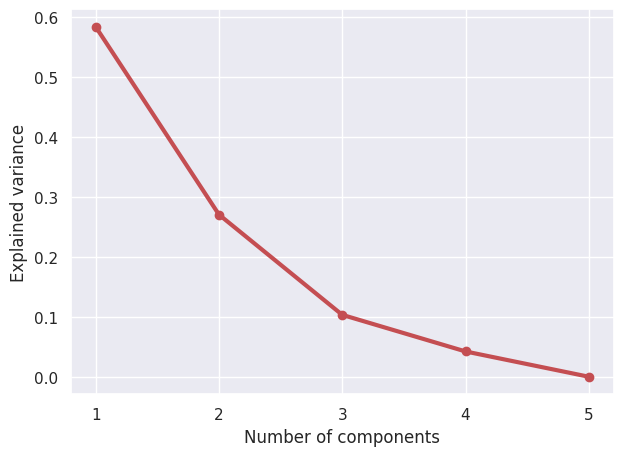

In [ ]:
# Generation of plot showing the ratio of each explained variance vs each principal component

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

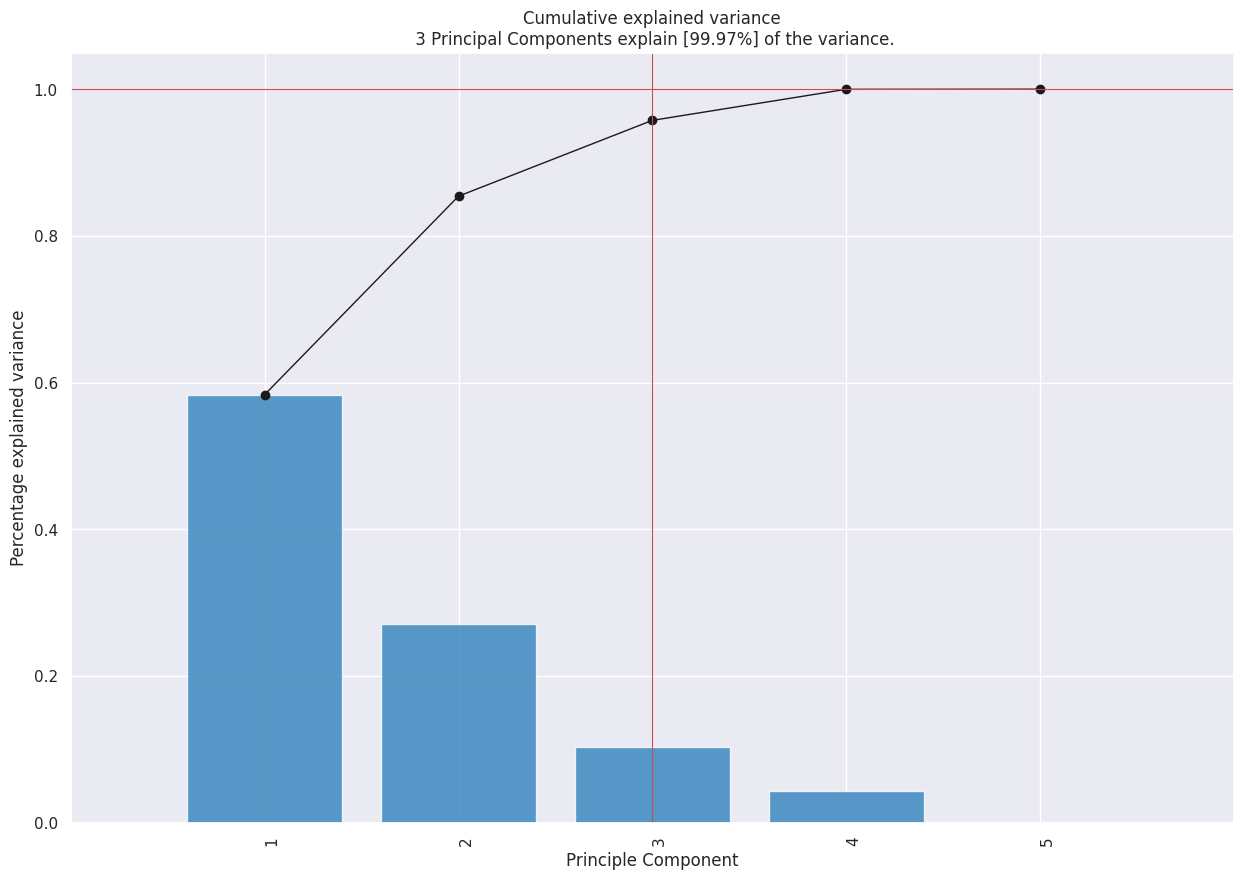

In [ ]:
# Plotting a pareto chart for the percentage explained variance and principal components

model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.97%] of the variance'}, xlabel='PC1 (58.3% expl.var)', ylabel='PC2 (27.0% expl.var)'>)

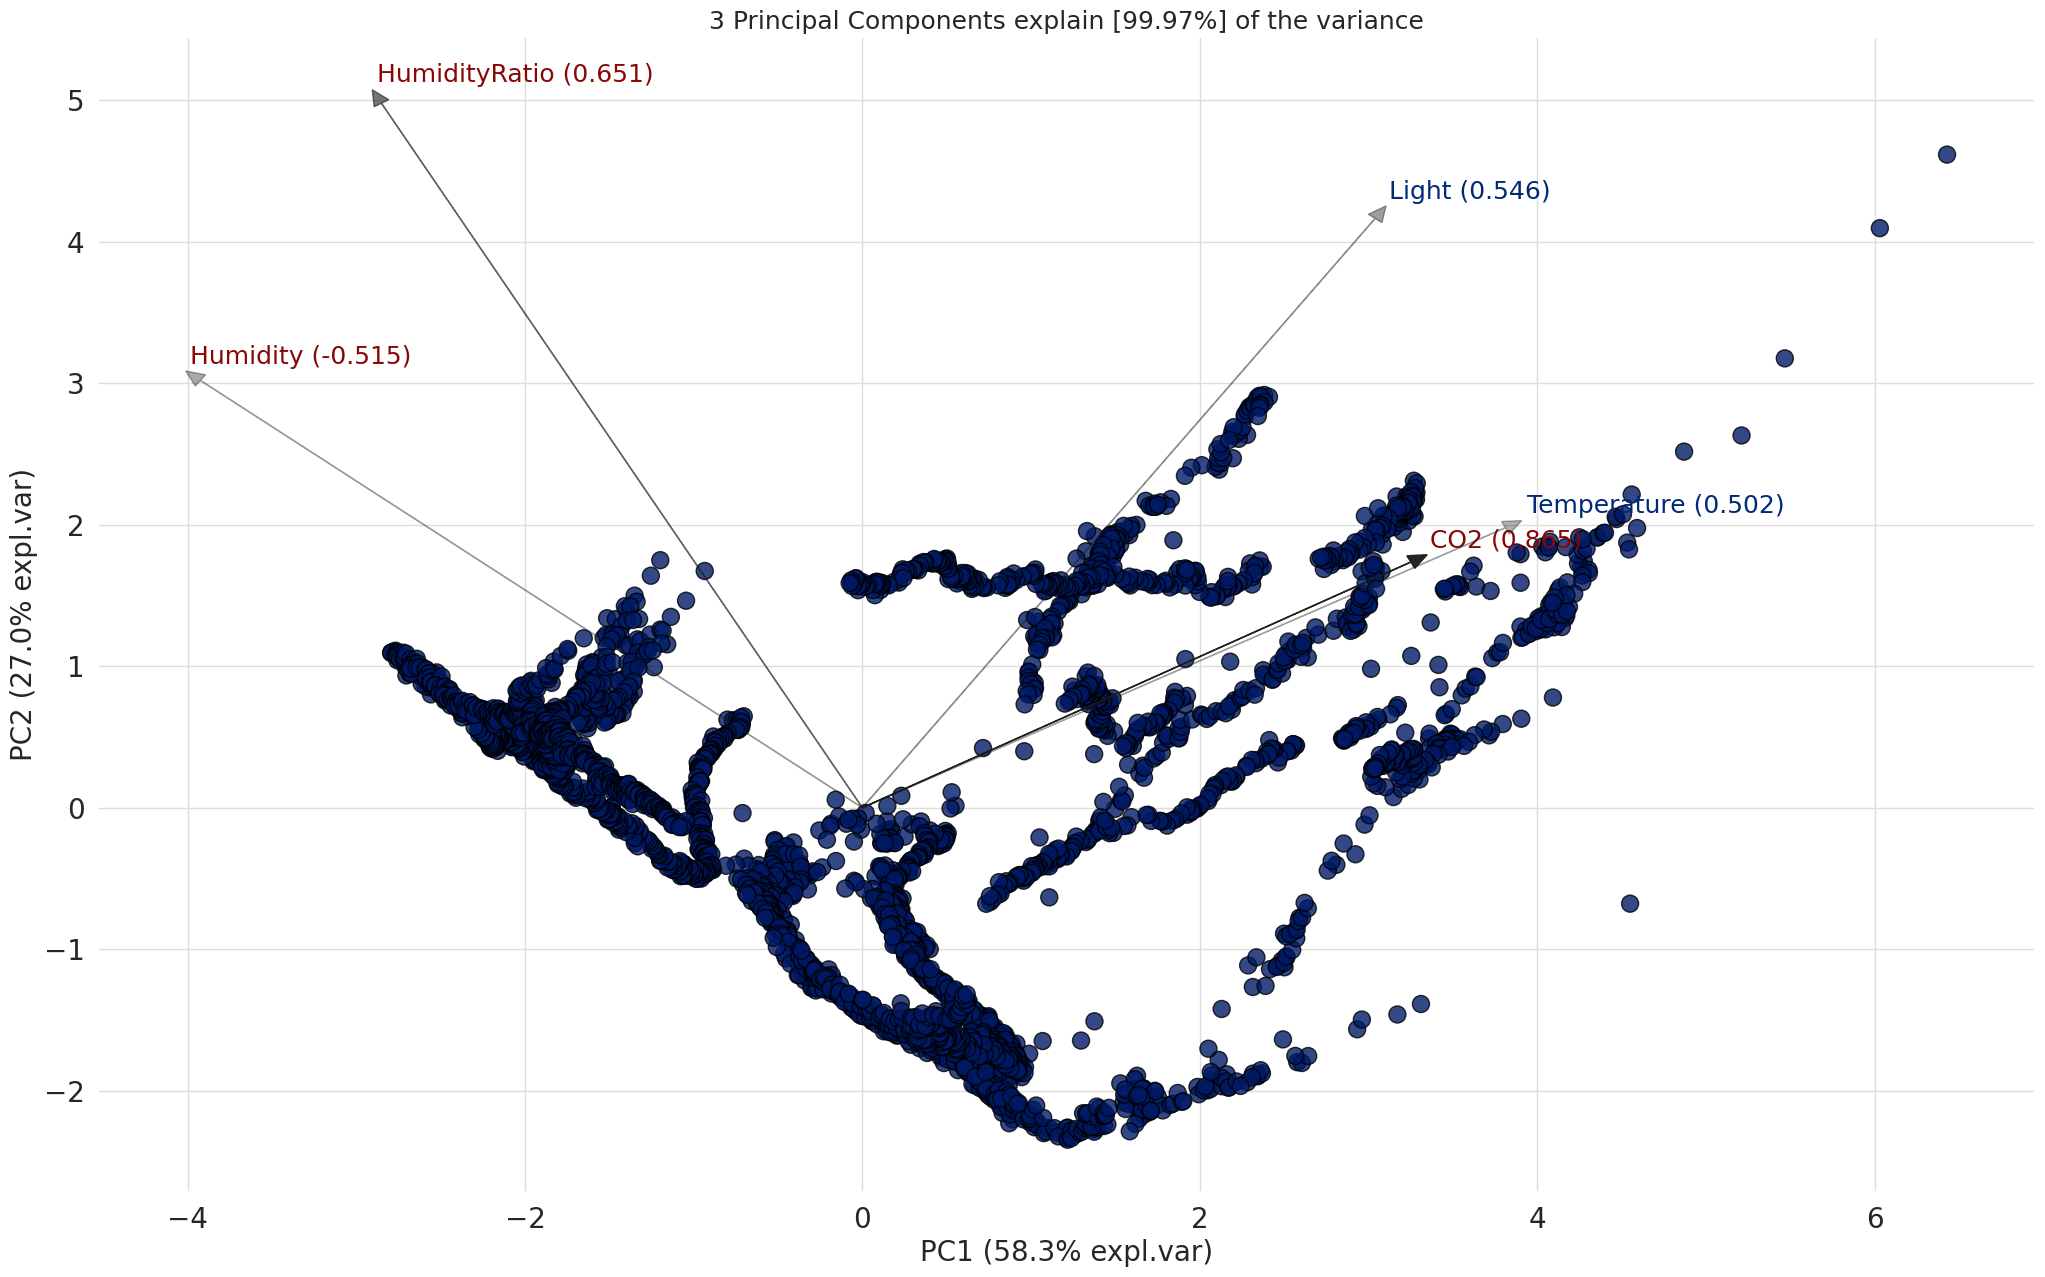

In [ ]:
# Generating a Bi-plot showing the scores of the attributes

model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.97%] of the variance'}, xlabel='PC1 (58.3% expl.var)', ylabel='PC2 (27.0% expl.var)', zlabel='PC3 (10.3% expl.var)'>)

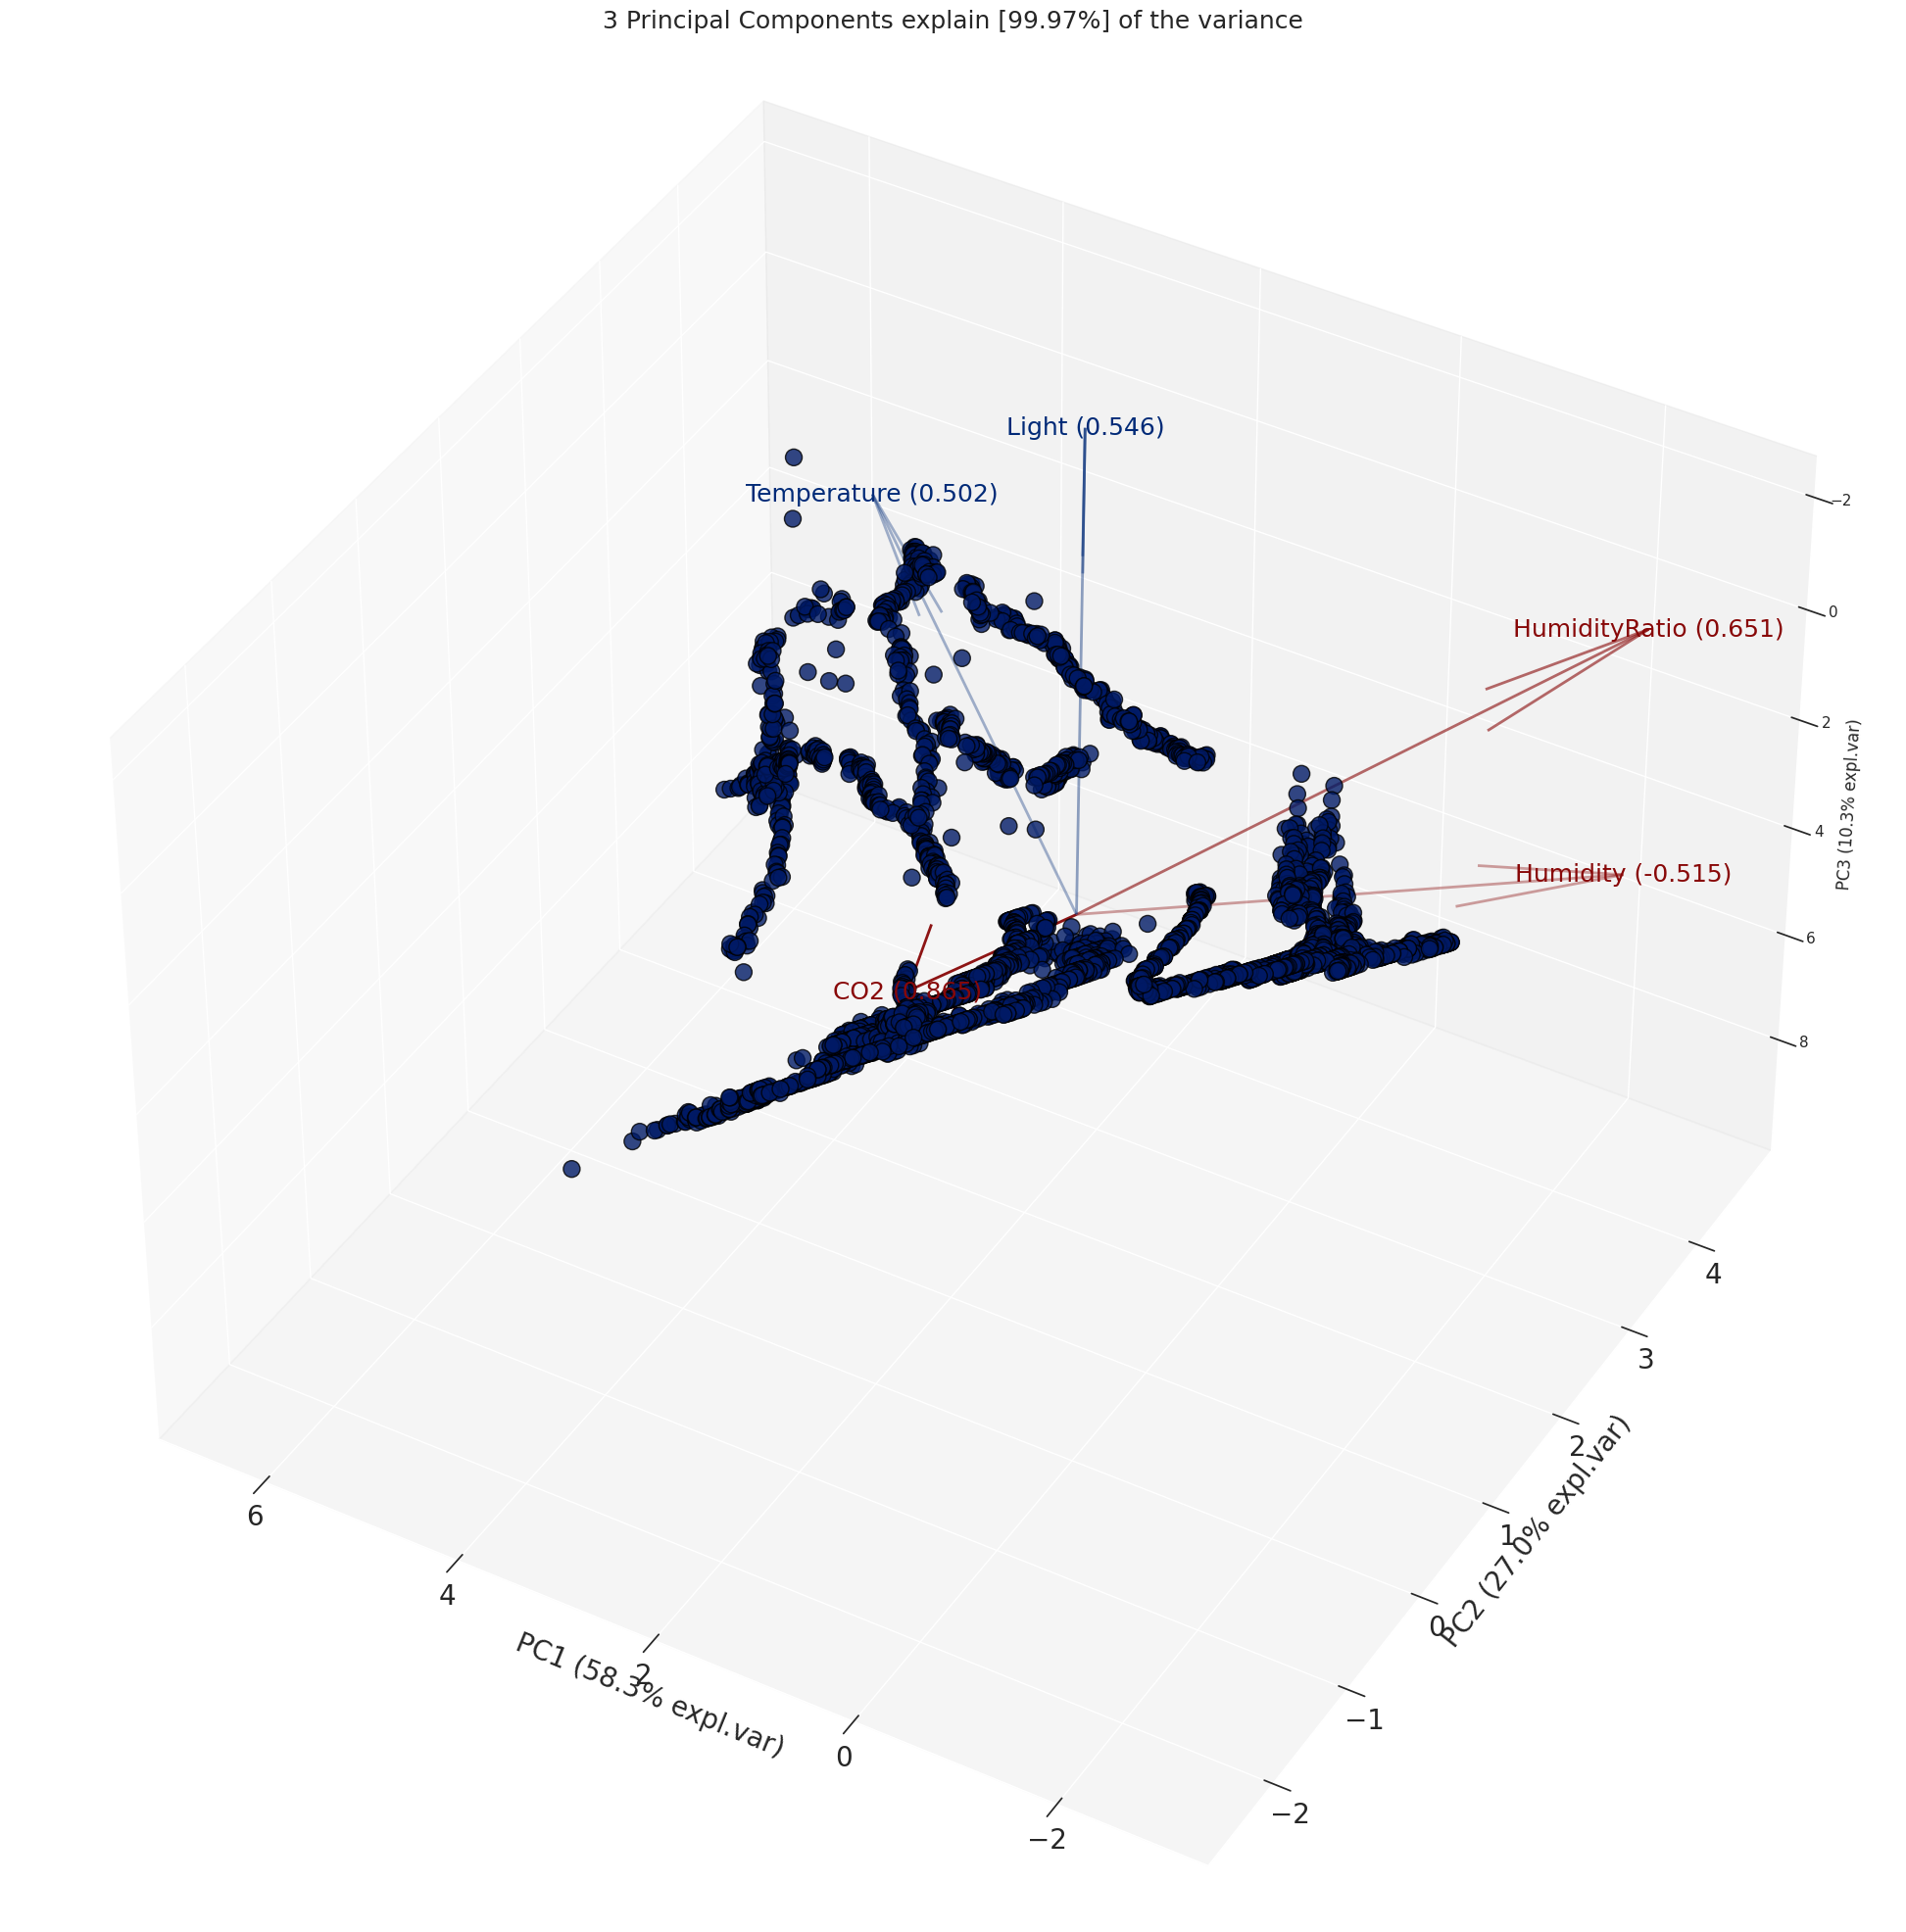

In [ ]:
# Plotting the same graph as above but in 3 Dimensional

model.biplot3d(legend=False)

**5. Comparison of Models before PCA**

In [ ]:
# Checking if the correct version is being used for further calculations

from pycaret.utils import version
version()

'3.2.0'

In [ ]:
# Splitting the data into two categories, one for modeling and one for predictions.
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3599, 6)
Unseen Data For Predictions: (1543, 6)


In [ ]:
# Performing classification analysis for occupancy where 70% of the data is going to be used for this model

from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.7, session_id=123)

**5.1 Top Model Statistics and Details**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Displaying the best model as per previous statistics

best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [ ]:
# Geneation of the model with the mean and standard deviation value

lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lda=tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

**5.2 Interactive Model**

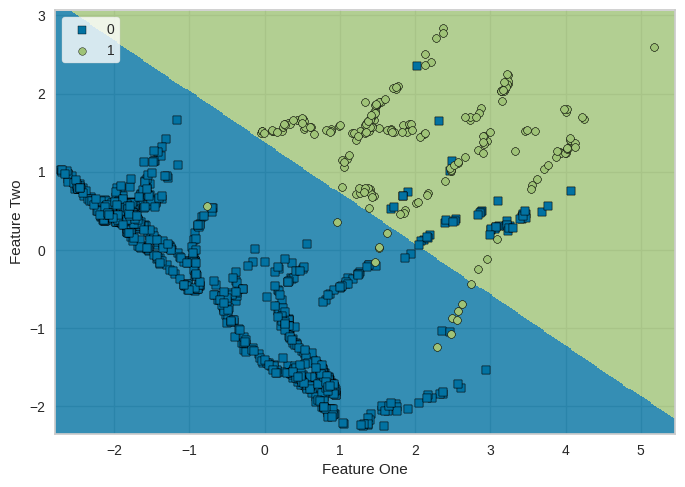

In [ ]:
# Generating an interactive model

evaluate_model(tuned_lda)

In [ ]:
!pip install statsmodels --upgrade

**6. Best Model After PCA**

In [ ]:
clf_pca = setup(data=data, target='Occupancy', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


**6.1 Top Model Statistics and Details**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Displaying the best model after PCA

best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Optimizing the best model

tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**6.2 Best Model Interactive Version**

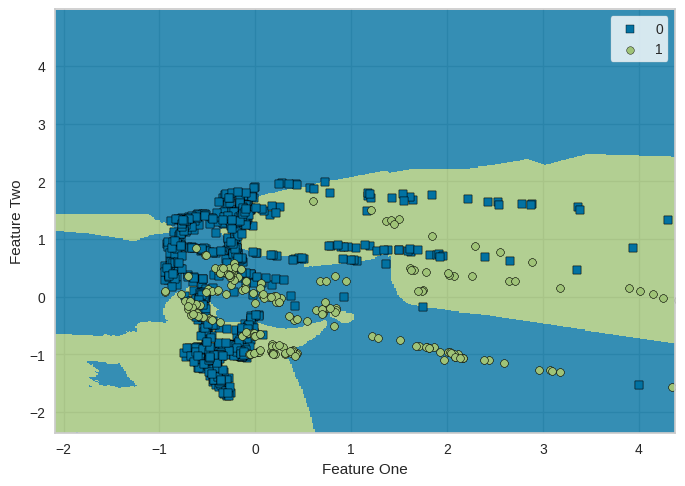

In [ ]:
# Displaying an interactive version of the best model

evaluate_model(tuned_best_model_pca)

**6.3 Second Best Model Analysis**

In [ ]:
# Creating the 2nd best model after PCA

et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tuning the model
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Displaying the optimized model's details
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
# Displaying an interactive model
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**6.4 Third Best Model Analysis**

In [ ]:
# Creating the 3rd best model after PCA - The Random Forest Classifier Model

rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Optimizing the model

tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Displaying the tuned model
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

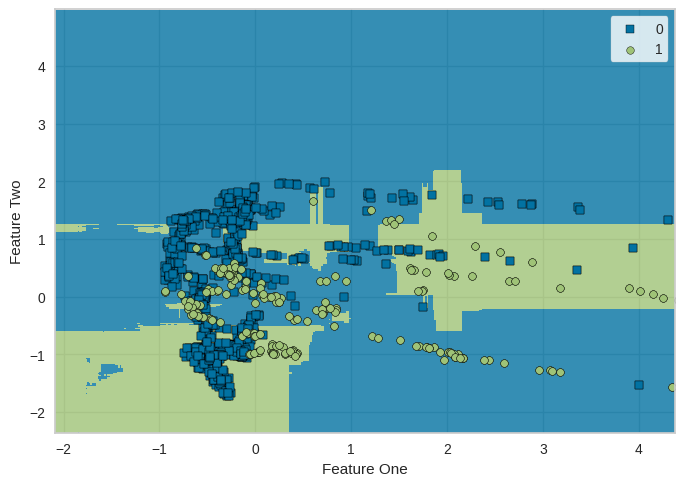

In [ ]:
# Displaying an interactive model
evaluate_model(tuned_rf_pca)

**6.5 Less Accurate Model for comparison between best model - Logistic Regression**

In [ ]:
# Creating a Logistic Regression model for analysis purposes:

lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Optimizing the model

tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Displaying the tuned model
tuned_lr_pca

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Displaying an interactive model
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…